In [1]:
# dataset comprises a large collection of tweets with binary sentiment labels (positive or negative).
# The aim is to build a robust machine learning model that can accurately classify the sentiment expressed in a given tweet.
import pandas as pd
import numpy as np
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import string

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
data_path = '/content/drive/MyDrive/NLP_assignment/training.1600000.processed.noemoticon.csv'

In [4]:
df = pd.read_csv(data_path, encoding='latin-1')

In [5]:
df.head()

,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer. You shoulda got David Carr of Third Day to do it. ;D"
0,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
1,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
2,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
3,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
4,0,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,@Kwesidei not the whole crew


In [6]:
df.columns = ["sentiment", "id", "date", "query", "user", "text"]

In [7]:
df = df.drop(columns=["id", "date", "query", "user"])

In [8]:
df.head()

,sentiment,text
0,0,is upset that he can't update his Facebook by ...
1,0,@Kenichan I dived many times for the ball. Man...
2,0,my whole body feels itchy and like its on fire
3,0,"@nationwideclass no, it's not behaving at all...."
4,0,@Kwesidei not the whole crew


In [9]:
lab_to_sentiment = {0:"Negative", 4:"Positive"}
def label_decoder(label):
  return lab_to_sentiment[label]
df.sentiment = df.sentiment.apply(lambda x: label_decoder(x))
df.head()

,sentiment,text
0,Negative,is upset that he can't update his Facebook by ...
1,Negative,@Kenichan I dived many times for the ball. Man...
2,Negative,my whole body feels itchy and like its on fire
3,Negative,"@nationwideclass no, it's not behaving at all...."
4,Negative,@Kwesidei not the whole crew


In [10]:
nltk.download("stopwords")
nltk.download("punkt")
nltk.download("wordnet")

stopwords = set(stopwords.words("english"))
stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [11]:
# Clean the text data
from nltk.tokenize import word_tokenize
def clean_text(text):
    # Remove special characters and numbers
    text = re.sub(r"[^a-zA-Z]", " ", text)

    # Convert to lowercase
    text = text.lower()

    # Remove URLs
    text = re.sub(r"http\S+|www\S+|https\S+", "", text)

    # Remove usernames
    text = re.sub('@[^\s]+', '', text)

    # Remove punctuations
    text = text.translate(str.maketrans("", "", string.punctuation))

    # Remove extra whitespaces
    text = re.sub(r"\s+", " ", text)
    #tokenizing words
    tokens = word_tokenize(text)
    #Removing Stop Words
    final_tokens = [w for w in tokens if w not in stopwords]
    #reducing a word to its word stem
    wordLemm = WordNetLemmatizer()
    finalwords=[]
    for w in final_tokens:
      if len(w)>1:
        word = wordLemm.lemmatize(w)
        finalwords.append(word)
    return ' '.join(finalwords)

    return text

In [12]:
df['processed_tweets'] = df['text'].apply(lambda x: clean_text(x))

In [13]:
df.head()

,sentiment,text,processed_tweets
0,Negative,is upset that he can't update his Facebook by ...,upset update facebook texting might cry result...
1,Negative,@Kenichan I dived many times for the ball. Man...,kenichan dived many time ball managed save res...
2,Negative,my whole body feels itchy and like its on fire,whole body feel itchy like fire
3,Negative,"@nationwideclass no, it's not behaving at all....",nationwideclass behaving mad see
4,Negative,@Kwesidei not the whole crew,kwesidei whole crew


In [14]:
(df.isnull().sum() / len(df))*100

sentiment           0.0
text                0.0
processed_tweets    0.0
dtype: float64

In [15]:
stemmer = nltk.SnowballStemmer("english")

def stemm_text(text):
    text = ' '.join(stemmer.stem(word) for word in text.split(' '))
    return text

df['processed_tweets'] = df['processed_tweets'].apply(stemm_text)
df.head()

,sentiment,text,processed_tweets
0,Negative,is upset that he can't update his Facebook by ...,upset updat facebook text might cri result sch...
1,Negative,@Kenichan I dived many times for the ball. Man...,kenichan dive mani time ball manag save rest g...
2,Negative,my whole body feels itchy and like its on fire,whole bodi feel itchi like fire
3,Negative,"@nationwideclass no, it's not behaving at all....",nationwideclass behav mad see
4,Negative,@Kwesidei not the whole crew,kwesidei whole crew


In [16]:
import seaborn as sns
from wordcloud import WordCloud
import matplotlib.pyplot as plt

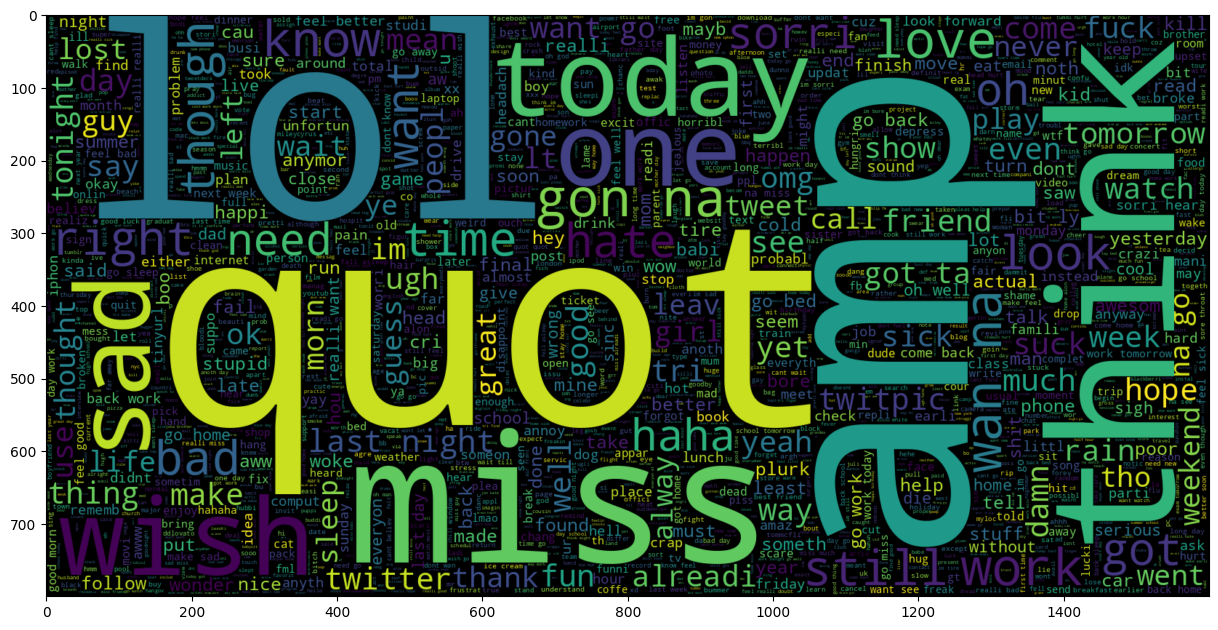

In [17]:
plt.figure(figsize = (15,15))
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800).generate(" ".join(df[df.sentiment == 'Negative'].processed_tweets))
plt.imshow(wc , interpolation = 'bilinear')

In [18]:
from sklearn.feature_extraction.text import TfidfVectorizer
vector = TfidfVectorizer(sublinear_tf=True)
X = vector.fit_transform(df['processed_tweets'])

In [19]:
y = df['sentiment']

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state=101)

In [21]:
def model_Evaluate(model):
    #accuracy of model on training data
    acc_train=model.score(X_train, y_train)
    #accuracy of model on test data
    acc_test=model.score(X_test, y_test)

    print('Accuracy of model on training data : {}'.format(acc_train*100))
    print('Accuracy of model on testing data : {} \n'.format(acc_test*100))

    # Predict values for Test dataset
    y_pred = model.predict(X_test)

    # Print the evaluation metrics for the dataset.
    print(classification_report(y_test, y_pred))

    # Compute and plot the Confusion matrix
    cf_matrix = confusion_matrix(y_test, y_pred)
    categories  = ['Negative','Positive']
    group_names = ['True Neg','False Pos', 'False Neg','True Pos']
    group_percentages = ['{0:.2%}'.format(value) for value in cf_matrix.flatten() / np.sum(cf_matrix)]

    labels = [f'{v1}\n{v2}' for v1, v2 in zip(group_names,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)

    sns.heatmap(cf_matrix, annot = labels, cmap = 'Reds',fmt = '',
                xticklabels = categories, yticklabels = categories)

    plt.xlabel("Predicted values", fontdict = {'size':14}, labelpad = 10)
    plt.ylabel("Actual values"   , fontdict = {'size':14}, labelpad = 10)
    plt.title ("Confusion Matrix", fontdict = {'size':18}, pad = 20)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy of model on training data : 80.26592208275163
Accuracy of model on testing data : 77.6075 

              precision    recall  f1-score   support

    Negative       0.79      0.75      0.77    159763
    Positive       0.76      0.80      0.78    160237

    accuracy                           0.78    320000
   macro avg       0.78      0.78      0.78    320000
weighted avg       0.78      0.78      0.78    320000



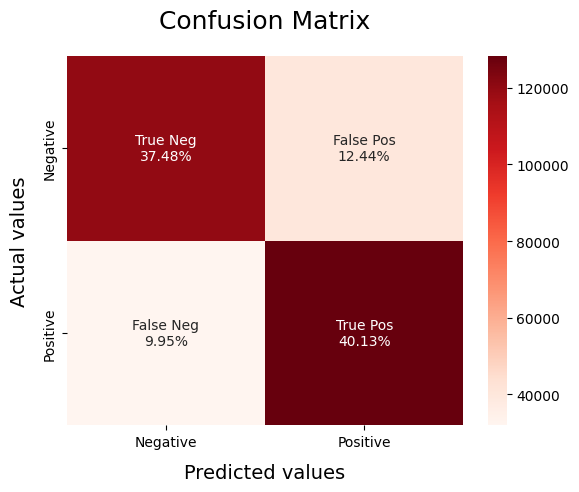

In [22]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
lg = LogisticRegression()
history=lg.fit(X_train, y_train)
model_Evaluate(lg)

In [ ]:
import xgboost as xgb
from sklearn.preprocessing import LabelEncoder

# Create an instance of LabelEncoder
label_encoder = LabelEncoder()

# Fit the label encoder on the target variable
y_train = label_encoder.fit_transform(y_train)
y_test = label_encoder.fit_transform(y_test)
xgb_model = xgb.XGBClassifier()
xgb_model.fit(X_train, y_train)
model_Evaluate(xgb_model)